# Figure_5.17 - Figure_5.20: Plotting shape-based parameters

Here the measurements that are used for training (size & shape) were also measured (shape) which is not the best scientific practice.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import mannwhitneyu

In [2]:
#folder
classifier_label_folder = '../crystal data/5. classification labels/5. size + shape/'

In [3]:
#tables
#all labels (after size exclusion)
table_all = pd.read_csv('all_measurements_normalized_image.csv')
table_all_testing = pd.read_csv('testing_all_measurements_normalized_image.csv')
table_all_both = pd.concat([table_all, table_all_testing], ignore_index = True)

#only good labels
good_crystals_training = pd.read_csv('good_crystals_size_shape.csv')
good_crystals_testing = pd.read_csv('testing_good_crystals_size_shape.csv')
good_crystals_both = pd.concat([good_crystals_training, good_crystals_testing], ignore_index = True)

### 1.) Solidity

In [4]:
#all labels (after size exclusion)
solidity1_all = table_all['solidity']
solidity2_all = table_all_testing['solidity']
solidity_all = table_all_both['solidity']

#only good labels
solidity1 = good_crystals_training['solidity']
solidity2 = good_crystals_testing['solidity']
solidity = good_crystals_both['solidity']

In [5]:
median_solidity_all = np.median(table_all_both['solidity'])
median_solidity_good_crystals = np.median(good_crystals_both['solidity'])

In [8]:
font = {'size' : 22}
matplotlib.rc('font',**font)

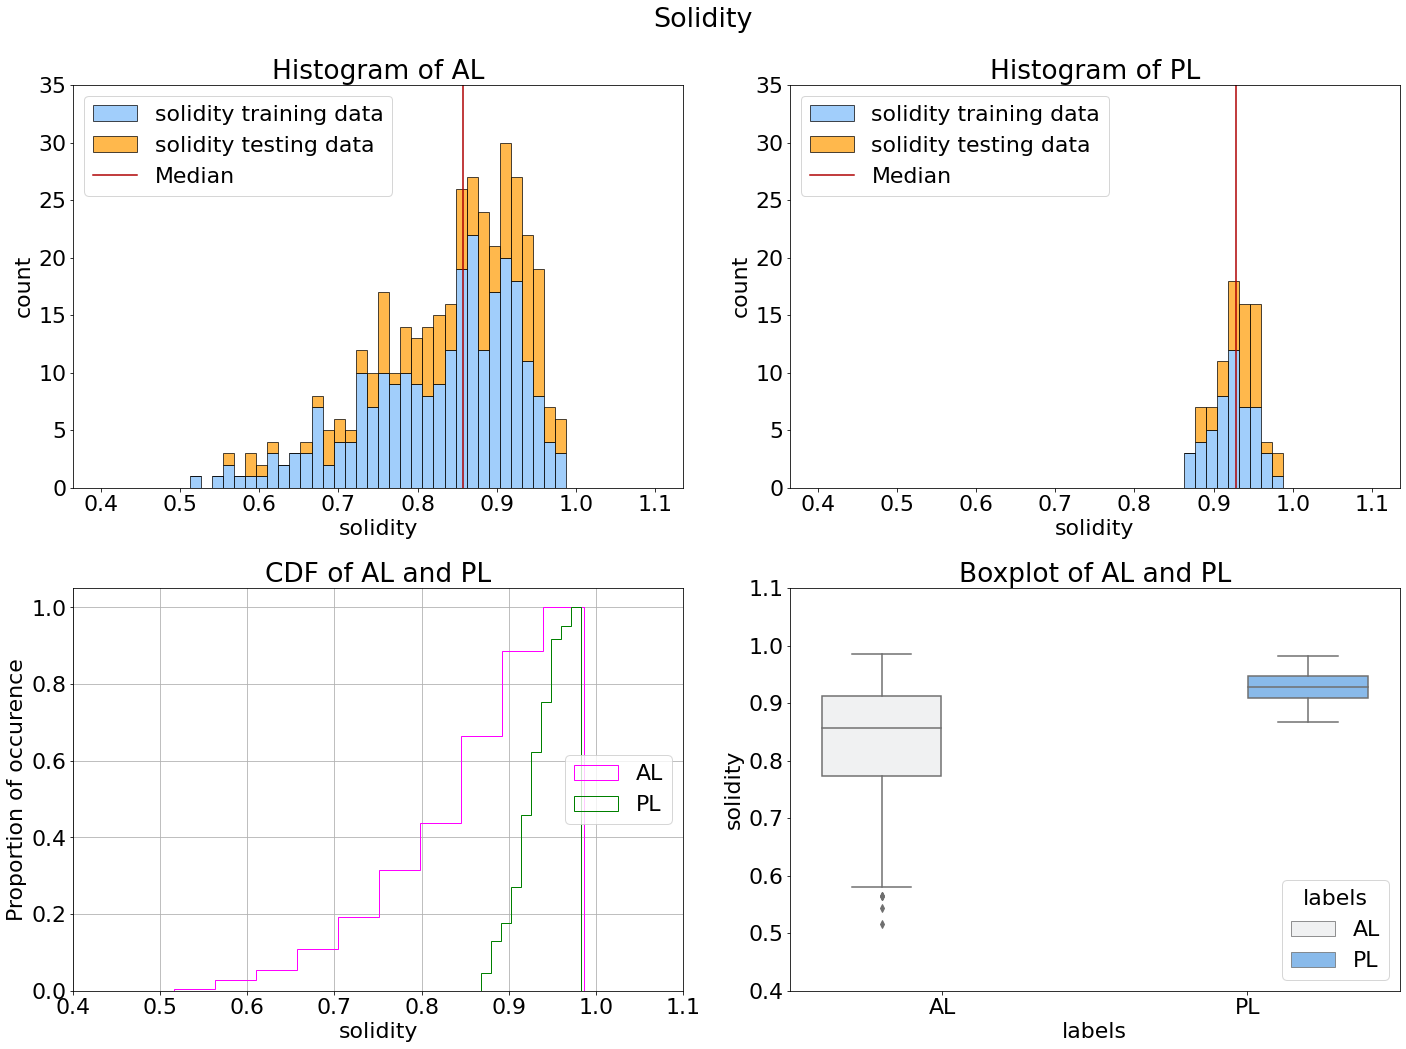

In [9]:
#histogram
# comparison solidity of all bigger crystal labels and selected good crystal labels
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Solidity', fontsize = 27)

#solidity measurements all crystal labels using classifier trained on shape and intensity
hist1_all_output = axes[0,0].hist(solidity1_all, bins = 50, label='solidity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0.4,1.1))
axes[0,0].hist(solidity2_all, label='solidity testing data', bins = 50, alpha=0.7, bottom = hist1_all_output[0], color = '#ff9a00', edgecolor='black', range = (0.4,1.1))
axes[0,0].axvline(median_solidity_all, color = '#ae0001', label = 'Median')
axes[0,0].set_xlabel('solidity')
axes[0,0].set_ylabel('count')
axes[0,0].legend()
axes[0,0].set_title('Histogram of AL')
axes[0,0].set_ylim(0,35)

#solidity measurements good crystal labels using classifier trained on shape and intensity
hist1_output = axes[0,1].hist(solidity1, bins = 50, label='solidity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0.4,1.1))
axes[0,1].hist(solidity2, bins = 50, label='solidity testing data', alpha=0.7,  bottom = hist1_output[0], color = '#ff9a00', edgecolor='black', range = (0.4,1.1))
axes[0,1].axvline(median_solidity_good_crystals, color = '#ae0001', label = 'Median')
axes[0,1].set_xlabel('solidity')
axes[0,1].set_ylabel('count')
axes[0,1].set_title('Histogram of PL')
axes[0,1].set_ylim(0,35)
axes[0,1].legend()

# cumulative distribution function
axes[1,0].hist(solidity_all, density=True, histtype='step', cumulative=True, label='AL', color = 'magenta')
axes[1,0].hist(solidity, density=True, histtype='step', cumulative=True, label='PL', color = 'green')
axes[1,0].grid(True)
axes[1,0].legend(loc='right')
axes[1,0].set_title('CDF of AL and PL')
axes[1,0].set_xlabel('solidity')
axes[1,0].set_ylabel('Proportion of occurence')
axes[1,0].set_xlim(0.4,1.1)

#boxplot
AL = pd.DataFrame(solidity_all)
AL['labels'] = ['AL']*len(solidity_all)
PL = pd.DataFrame(solidity)
PL['labels'] = ['PL']*len(solidity)
boxplot_table = pd.concat([AL, PL], ignore_index = True)
boxplot_all = sns.boxplot(x = 'labels', y = 'solidity',  data = boxplot_table, hue = 'labels', color = '#79bafa', ax = axes[1,1])
axes[1,1].set_ylim([0.4,1.1])
axes[1,1].set_title('Boxplot of AL and PL')

plt.tight_layout()

#### Filtered out labels

In [10]:
#numbr of objects in all labels
trends_table_all_both = table_all_both.describe()
counted_objects_all = trends_table_all_both.loc['count']['area']
counted_objects_all

378.0

In [11]:
#number of objects in good crystal labels
trends_table_good_crystals_both = good_crystals_both.describe()
counted_objects_good_crystals = trends_table_good_crystals_both.loc['count']['area']
counted_objects_good_crystals

85.0

#### Median and IQR

In [6]:
median_solidity_all

0.857705286839145

In [7]:
median_solidity_good_crystals

0.9282700421940928

In [33]:
#Q1 AL
np.percentile(solidity_all,25)

0.7744138054883845

In [34]:
#Q3 AL
np.percentile(solidity_all,75)

0.9128527841342488

In [35]:
#Q1 PL
np.percentile(solidity,25)

0.9099405267629568

In [36]:
#Q3 PL
np.percentile(solidity,75)

0.9468503937007874

#### Mann-Whitney U test

In [18]:
#significance
mannwhitneyu(table_all_both['solidity'], good_crystals_both['solidity'], method='exact')

MannwhitneyuResult(statistic=5722.5, pvalue=5.216890728661003e-23)

### 2.) Aspect ratio

In [12]:
#all labels (after size exclusion)
aspect_ratio1_all = table_all['aspect_ratio']
aspect_ratio2_all = table_all_testing['aspect_ratio']
aspect_ratio_all = table_all_both['aspect_ratio']

#only good labels
aspect_ratio1 = good_crystals_training['aspect_ratio']
aspect_ratio2 = good_crystals_testing['aspect_ratio']
aspect_ratio = good_crystals_both['aspect_ratio']

In [13]:
median_aspect_ratio_all = np.median(table_all_both['aspect_ratio'])
median_aspect_ratio_good_crystals = np.median(good_crystals_both['aspect_ratio'])

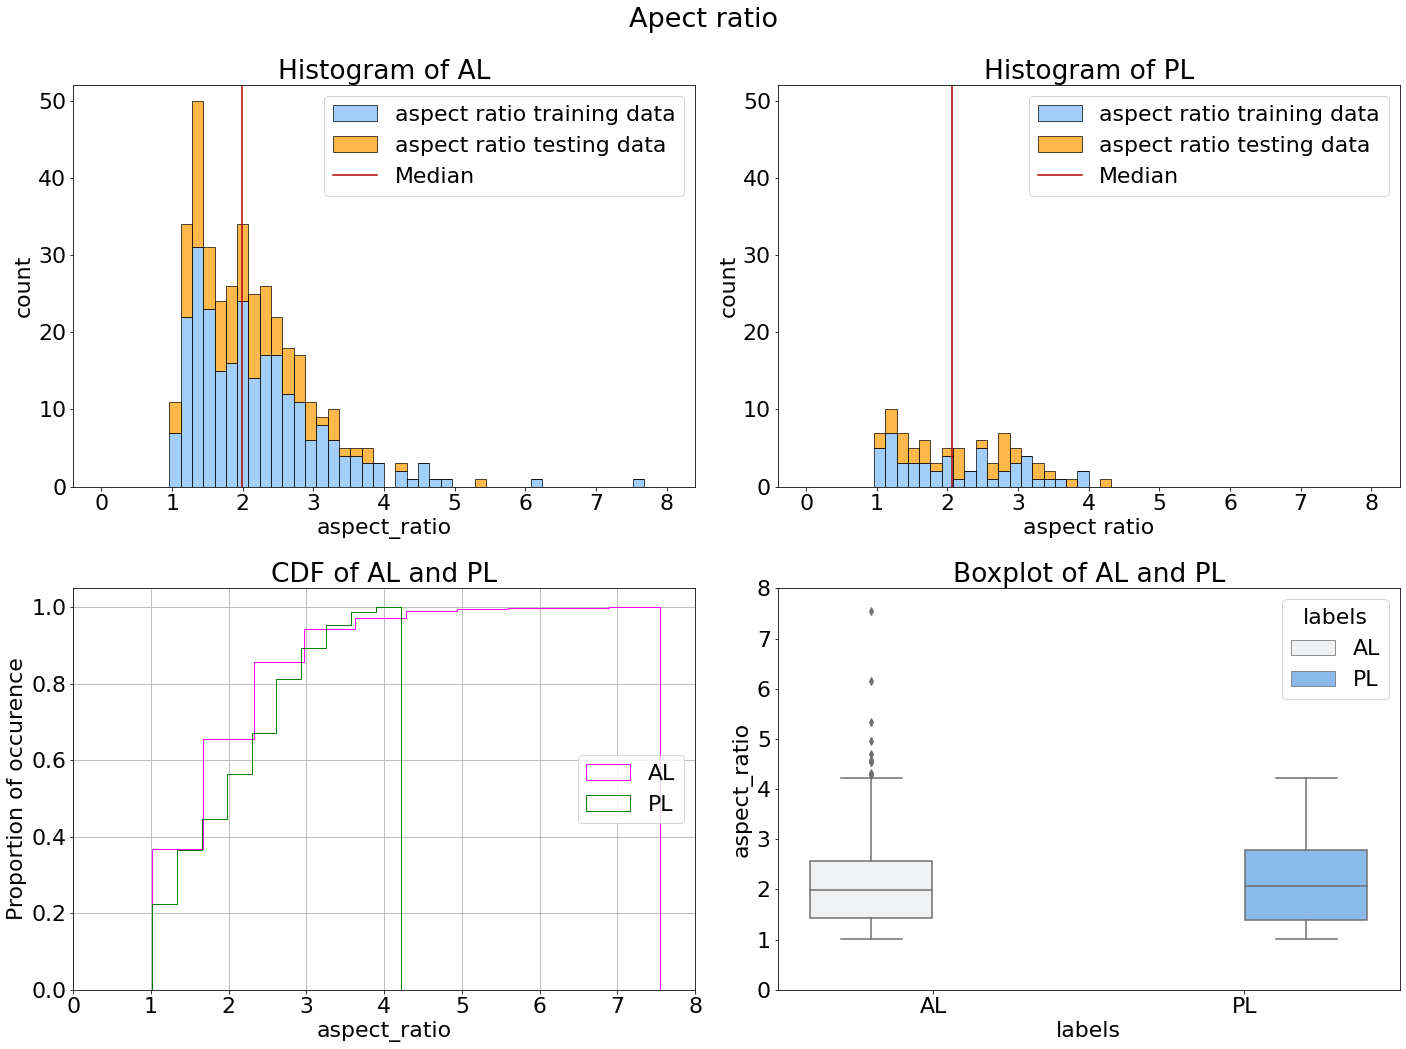

In [16]:
#histogram
# comparison aspect ratio of all bigger crystal labels and selected good crystal labels
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Apect ratio', fontsize = 27)

#aspect ratio measurements all crystal labels using classifier trained on shape and intensity
hist1_all_output = axes[0,0].hist(aspect_ratio1_all, bins = 50, label='aspect ratio training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0,8))
axes[0,0].hist(aspect_ratio2_all, bins = 50, label='aspect ratio testing data', alpha=0.7, bottom = hist1_all_output[0], color = '#ff9a00', edgecolor='black', range = (0,8))
axes[0,0].axvline(median_aspect_ratio_all, color = '#ae0001', label = 'Median')
axes[0,0].set_xlabel('aspect_ratio')
axes[0,0].set_ylabel('count')
axes[0,0].legend()
axes[0,0].set_title('Histogram of AL')
axes[0,0].set_ylim(0,52)

#aspect ratio measurements good crystal labels using classifier trained on shape and intensity
hist1_output = axes[0,1].hist(aspect_ratio1, bins = 50, label='aspect ratio training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0,8))
axes[0,1].hist(aspect_ratio2, bins = 50, label='aspect ratio testing data', alpha=0.7,  bottom = hist1_output[0], color = '#ff9a00', edgecolor='black', range = (0,8))
axes[0,1].axvline(median_aspect_ratio_good_crystals, color = '#ae0001', label = 'Median')
axes[0,1].set_xlabel('aspect ratio')
axes[0,1].set_ylabel('count')
axes[0,1].set_title('Histogram of PL')
axes[0,1].set_ylim(0,52)
axes[0,1].legend()

# cumulative distribution function
axes[1,0].hist(aspect_ratio_all, density=True, histtype='step', cumulative=True, label='AL', color = 'magenta')
axes[1,0].hist(aspect_ratio, density=True, histtype='step', cumulative=True, label='PL', color = 'green')
axes[1,0].grid(True)
axes[1,0].legend(loc='right')
axes[1,0].set_title('CDF of AL and PL')
axes[1,0].set_xlabel('aspect_ratio')
axes[1,0].set_ylabel('Proportion of occurence')
axes[1,0].set_xlim(0,8)

#boxplot
AL = pd.DataFrame(aspect_ratio_all)
AL['labels'] = ['AL']*len(aspect_ratio_all)
PL = pd.DataFrame(aspect_ratio)
PL['labels'] = ['PL']*len(aspect_ratio)
boxplot_table = pd.concat([AL, PL], ignore_index = True)
boxplot_all = sns.boxplot(x = 'labels', y = 'aspect_ratio',  data = boxplot_table, hue = 'labels', color = '#79bafa', ax = axes[1,1])
axes[1,1].set_ylim([0,8])
axes[1,1].set_title('Boxplot of AL and PL')

plt.tight_layout()

#### Median and IQR

In [14]:
median_aspect_ratio_all

1.9838171720366091

In [15]:
median_aspect_ratio_good_crystals

2.0715205627982107

In [25]:
#Q1 AL
np.percentile(aspect_ratio_all,25)

1.4398297293539402

In [26]:
#Q3 AL
np.percentile(aspect_ratio_all,75)

2.561095364399808

In [27]:
#Q1 PL
np.percentile(aspect_ratio,25)

1.3814389141983896

In [28]:
#Q3 PL
np.percentile(aspect_ratio,75)

2.785687572961149

#### Mann-Whitney U test

In [19]:
mannwhitneyu(table_all_both['aspect_ratio'], good_crystals_both['aspect_ratio'], method='exact')

MannwhitneyuResult(statistic=15736.5, pvalue=0.7692935890255369)

### 3.) Circularity

In [41]:
#all labels (after size exclusion)
circularity1_all = table_all['circularity']
circularity2_all = table_all_testing['circularity']
circularity_all = table_all_both['circularity']

#only good labels
circularity1 = good_crystals_training['circularity']
circularity2 = good_crystals_testing['circularity']
circularity = good_crystals_both['circularity']

In [42]:
median_circularity_all = np.median(table_all_both['circularity'])
median_circularity_good_crystals = np.median(good_crystals_both['circularity'])

In [50]:
#Q1 AL
np.percentile(circularity_all,25)

0.41759868809274237

In [51]:
#Q3 AL
np.percentile(circularity_all,75)

0.7783560783846091

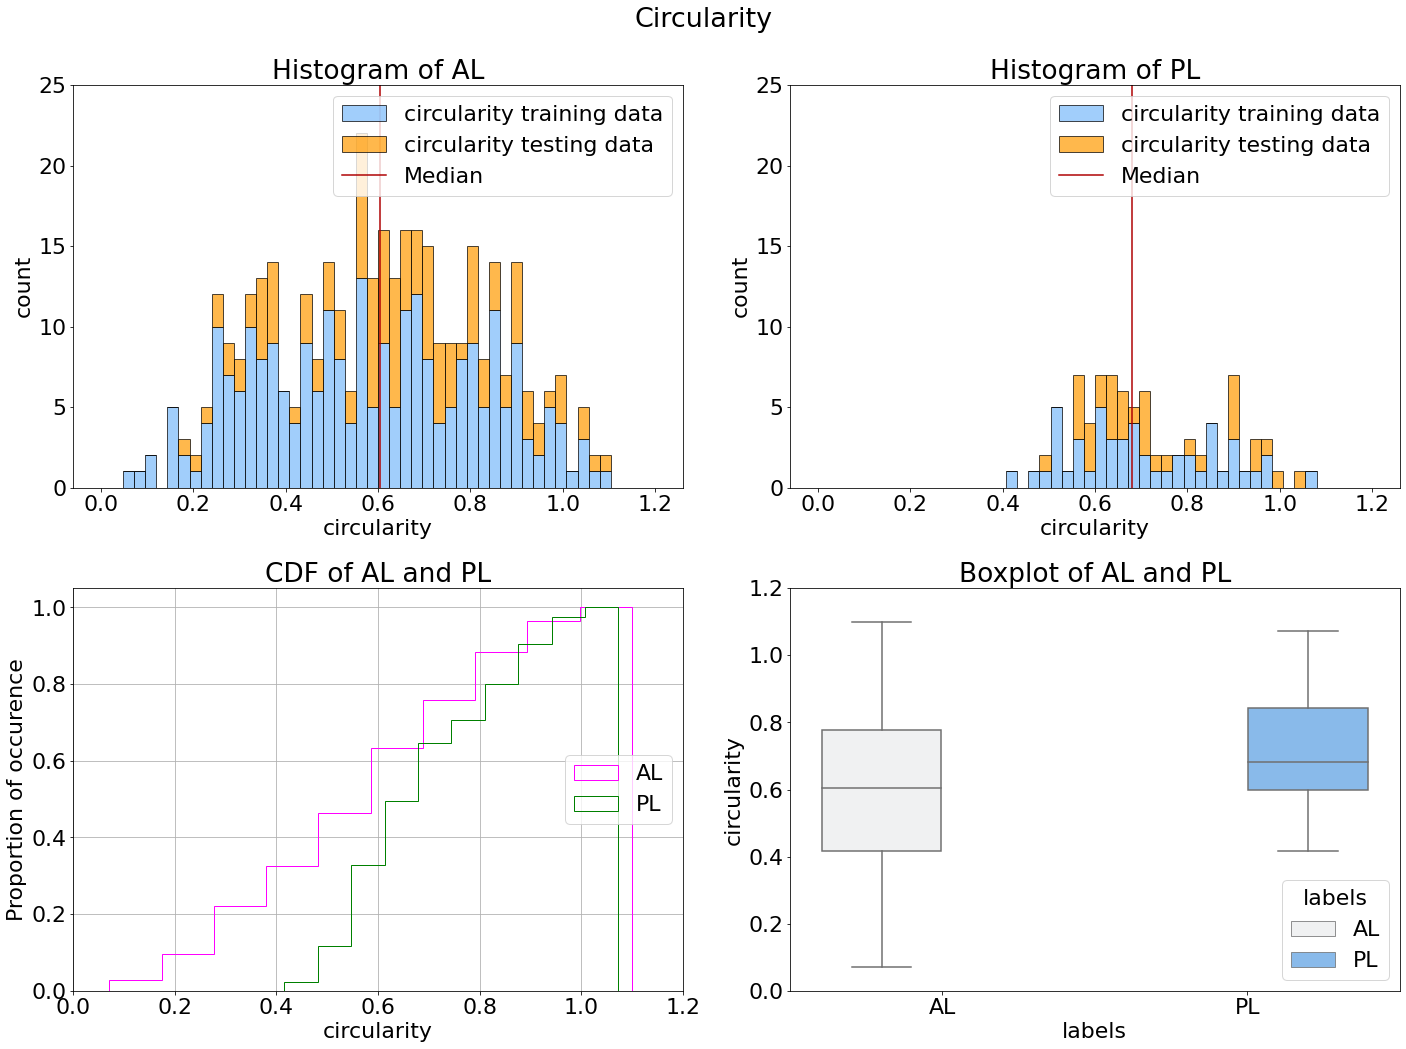

In [30]:
#histogram
# comparison circularity of all bigger crystal labels and selected good crystal labels
fig, axes = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Circularity', fontsize = 27)

#circularity measurements all crystal labels using classifier trained on shape and intensity
hist1_all_output = axes[0,0].hist(circularity1_all, bins = 50, label='circularity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0,1.2))
axes[0,0].hist(circularity2_all, bins = 50, label='circularity testing data', alpha=0.7, bottom = hist1_all_output[0], color = '#ff9a00', edgecolor='black', range = (0,1.2))
axes[0,0].axvline(median_circularity_all, color = '#ae0001', label = 'Median')
axes[0,0].set_xlabel('circularity')
axes[0,0].set_ylabel('count')
axes[0,0].legend()
axes[0,0].set_title('Histogram of AL')
axes[0,0].set_ylim(0,25)

#circularity measurements good crystal labels using classifier trained on shape and intensity
hist1_output = axes[0,1].hist(circularity1, bins = 50, label='circularity training data', alpha=0.7, color = '#79bafa', edgecolor='black', range = (0,1.2))
axes[0,1].hist(circularity2, bins = 50, label='circularity testing data', alpha=0.7,  bottom = hist1_output[0], color = '#ff9a00', edgecolor='black', range = (0,1.2))
axes[0,1].axvline(median_circularity_good_crystals, color = '#ae0001', label = 'Median')
axes[0,1].set_xlabel('circularity')
axes[0,1].set_ylabel('count')
axes[0,1].set_title('Histogram of PL')
axes[0,1].set_ylim(0,25)
axes[0,1].legend()

# cumulative distribution function
axes[1,0].hist(circularity_all, density=True, histtype='step', cumulative=True, label='AL', color = 'magenta')
axes[1,0].hist(circularity, density=True, histtype='step', cumulative=True, label='PL', color = 'green')
axes[1,0].grid(True)
axes[1,0].legend(loc='right')
axes[1,0].set_title('CDF of AL and PL')
axes[1,0].set_xlabel('circularity')
axes[1,0].set_ylabel('Proportion of occurence')
axes[1,0].set_xlim(0,1.2)

#boxplot
AL = pd.DataFrame(circularity_all)
AL['labels'] = ['AL']*len(circularity_all)
PL = pd.DataFrame(circularity)
PL['labels'] = ['PL']*len(circularity)
boxplot_table = pd.concat([AL, PL], ignore_index = True)
boxplot_all = sns.boxplot(x = 'labels', y = 'circularity',  data = boxplot_table, hue = 'labels', color = '#79bafa', ax = axes[1,1])
axes[1,1].set_ylim([0,1.2])
axes[1,1].set_title('Boxplot of AL and PL')

plt.tight_layout()

#### Median and IQR

In [43]:
median_circularity_all

0.604669278486

In [44]:
median_circularity_good_crystals

0.6813093299484254

In [52]:
#Q1 PL
np.percentile(circularity,25)

0.6000643226470007

In [53]:
#Q3 PL
np.percentile(circularity,75)

0.8445864137535779

#### Mann-Whitney U test

In [20]:
mannwhitneyu(table_all_both['circularity'], good_crystals_both['circularity'], method='exact')

MannwhitneyuResult(statistic=11486.5, pvalue=3.425962884223623e-05)